### Import necessary libraries

In [133]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pylab
import random
from collections import Counter

### Configure matplotlib

In [134]:
%matplotlib inline

### Source code

In [135]:
def generate_graph(t):
    assert t >= 0
    
    G = nx.MultiGraph()
    G.add_edge(0, 1)

    edges_list = [(0, 1)]

    for i in range(1, t + 1):
        new_node = i + 1
        G.add_node(new_node)
        edge = random.choice(edges_list)
        G.add_edge(new_node, edge[0])
        G.add_edge(new_node, edge[1])
        edges_list.append((new_node, edge[0]))
        edges_list.append((new_node, edge[1]))
    return G

In [136]:
def proportion_of_nodes_with_degree(graph, degree):
    nodes = graph.number_of_nodes()
    counter = Counter()
    for node in graph.nodes():
        if nx.degree(graph, node) == degree:
            counter[degree] += 1
    return float(counter[degree]) / nodes

### Draw graphic for different values of t parameter

In [143]:
t = 3000
parameter_values = []
nodes_proportion = []

for i in range(0, t + 100, 100):
    parameter_values.append(i)
    
    graph = generate_graph(i)
    proportion = proportion_of_nodes_with_degree(graph, 2)
    nodes_proportion.append(proportion)

In [144]:
print('Proportion of nodes with degree 2 is {0}, when all nodes are {1}'.format(
    nodes_proportion[-1], parameter_values[-1])
)

Proportion of nodes with degree 2 is 0.5, when all nodes are 3000


### Draw graphic

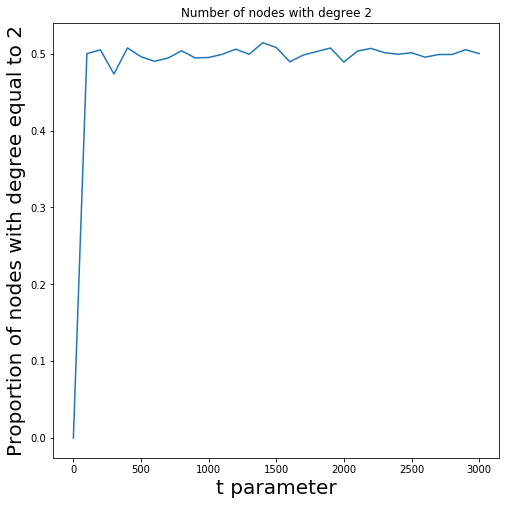

In [145]:
pylab.rcParams['figure.figsize'] = 8, 8
plt.plot(parameter_values, nodes_proportion)
plt.title('Number of nodes with degree 2')
plt.xlabel('t parameter', fontsize=20)
plt.ylabel('Proportion of nodes with degree equal to 2', fontsize=20)
plt.show()